EEG signal classification 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.metrics import accuracy_score

loading dataset and showing the 5 fist rows


In [95]:
df=pd.read_csv('emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


more information about dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


ploting features

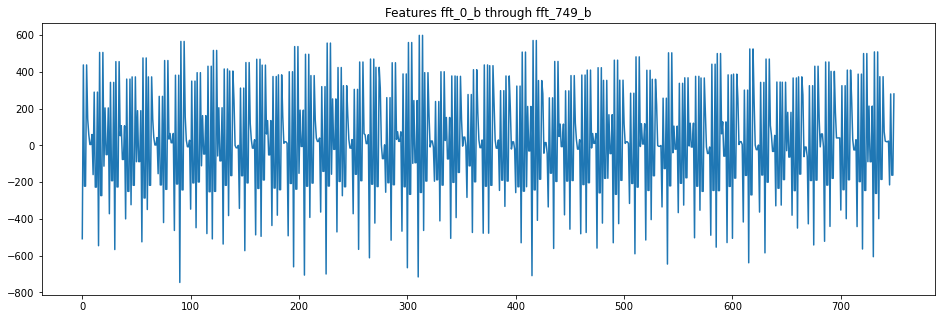

In [21]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

Pre-processing

In [22]:
df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [23]:
df.isnull()
df.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [96]:
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
df_encoded = df.replace(encode)

print(df_encoded.head())
print(df_encoded['label'].value_counts())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

droping y from x

In [97]:
x = df_encoded.drop(["label"]  ,axis=1)
y = df_encoded.loc[:,'label'].values

print(x.shape)
print(y.shape)

(2132, 2548)
(2132,)


In [98]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
y = to_categorical(y)
y


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

test train split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [28]:
print(x_train.shape)

(1705, 1, 2548)


defining the LSTM model

In [29]:
model = Sequential()
model.add(LSTM(64, input_shape=(1,2548),activation="tanh",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))

compling model

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             668928    
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 681,443
Trainable params: 681,443
Non-trainable params: 0
_________________________________________________________________


Training model

In [31]:
history = model.fit(x_train, y_train, epochs = 20, validation_data= (x_test, y_test))

Epoch 1/20
54/54 [==============================] - 17s 87ms/step - loss: 0.7293 - accuracy: 0.7853 - val_loss: 0.5156 - val_accuracy: 0.9063
Epoch 2/20
54/54 [==============================] - 2s 41ms/step - loss: 0.4164 - accuracy: 0.9308 - val_loss: 0.3496 - val_accuracy: 0.9110
Epoch 3/20
54/54 [==============================] - 2s 42ms/step - loss: 0.2777 - accuracy: 0.9402 - val_loss: 0.2583 - val_accuracy: 0.9321
Epoch 4/20
54/54 [==============================] - 2s 43ms/step - loss: 0.2225 - accuracy: 0.9413 - val_loss: 0.2143 - val_accuracy: 0.9274
Epoch 5/20
54/54 [==============================] - 2s 43ms/step - loss: 0.1746 - accuracy: 0.9531 - val_loss: 0.1889 - val_accuracy: 0.9297
Epoch 6/20
54/54 [==============================] - 2s 42ms/step - loss: 0.1439 - accuracy: 0.9601 - val_loss: 0.1715 - val_accuracy: 0.9344
Epoch 7/20
54/54 [==============================] - 2s 45ms/step - loss: 0.1125 - accuracy: 0.9718 - val_loss: 0.1475 - val_accuracy: 0.9438
Epoch 8/20
5

In [32]:
score, acc = model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.1192 - accuracy: 0.9578


In [33]:
score, acc = model.evaluate(x_train, y_train)

54/54 [==============================] - 1s 15ms/step - loss: 0.0092 - accuracy: 0.9982


Prediction

In [36]:
pred = model.predict(x_test)
predicted_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes,predicted_classes)
print(f"Training Accuracy: {correct}")

Training Accuracy: 0.9578454332552693


In [46]:
predicted_emotions = model.predict(x_test)
predicted_emotion = np.argmax(predicted_emotions[0])
expected_emotion = np.argmax(y_test[0])
print('the actual class:',predicted_emotion)
print('the predicted class:',predicted_emotion)

the actual class: 1
the predicted class: 1


In [49]:
predict = model.predict(x_test)
predicted_classes = np.argmax(predict,axis=1)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes,predicted_classes)
print("Test Accuracy: {:.3f}%".format(correct * 100))

Test Accuracy: 95.785%


confusion matrix

Confusion Matrix
[[151   2   0]
 [  4 127  11]
 [  0   1 131]]


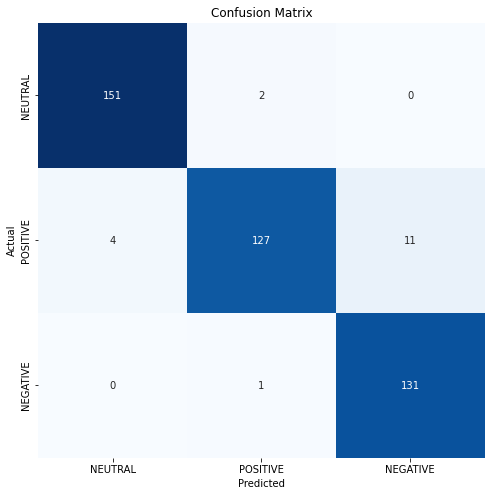

In [83]:
# encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )

y_pred = np.argmax(model.predict(x_test),axis=1)
y_test = np.argmax(y_test,axis=1)

cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, encode.keys())
plt.yticks(np.arange(3) + 0.5, encode.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification report

In [84]:
clr = classification_report(y_test, y_pred, target_names=encode.keys())
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

     NEUTRAL       0.97      0.99      0.98       153
    POSITIVE       0.98      0.89      0.93       142
    NEGATIVE       0.92      0.99      0.96       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



GRU model

data

In [4]:
df= pd.read_csv('emotions.csv')
df = df.copy()
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )

df['label'] = df['label'].replace(encode)

y = df['label'].copy()
x = df.drop('label', axis=1).copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit( x_train,  y_train, validation_data= (x_test, y_test), epochs=20)

NameError: name 'model' is not defined